# Final Project
Imported libraries. The dataset we're using is OSMI 2016 Mental Health Tech Survey.

## Names
- A14996574 Caroline Hogan
- A13572112 Adriana Ramirez
- A13956816 Gabriela Gutierrez
- A13613392 Abhiram Iyer
- A14029279 Cang Le

## Introduction and Background 

Many [tech entrepreneurs have realized that mental health](https://www.statnews.com/2018/07/20/tech-developers-tackle-mental-health/) is becoming a more relevant issue in the tech industry, as it’s a high-pressure environment and often unreasonable work hours negatively impact the health of many employees. As a result, many companies and startups are now focusing on addressing these problems, with new technologies like chatbots that help provide assistance to those who need it. However, as many have realized, a technological solution to solving this specific problem might be counterintuitive - forcing many to use apps or similar solutions to helping relieve anxiety might only spur greater agitation. Thus, while many startups are trying to conquer the “mental health space” with new ideas, not many attempts to understand the root causes and reasons for tech-related mental health issues. We hope to find and analyze some of these fundamental causes ourselves so we can draw meaningful conclusions ourselves.

The dataset we are working with attempts to describe various employees’ reactions and attitudes towards mental health in the tech workplace. Specifically, each employee discusses how they believe their company prioritizes mental health, and the general attitude and environment in the workplace regarding mental health. The dataset covers “tangible” features that the employees responded to, like whether their employer provides mental health benefits or not (e.g. a concrete question without much room for subjectivity). The dataset also covers more subjective questions, like whether the employee would feel comfortable raising mental health related topics with their manager or supervisor. We can correlate the objective and subjective viewpoints provided by each employee’s survey, and then be able to extrapolate some specific trends.

Our greater inquiry we are attempting to investigate is how certain qualities of tech companies affect the mental health of their employees. Due to largely subjective nature of the data on this topic, we’ve decided to center our data analysis around two quantitative variables of each response, their company size (number of employees) and the participant's age. This will allow us to find correlation between our other variables, which are largely yes or no questions, and objective variables with more variation. These two variables may also shed light on how size and bureaucracy affects employee well-being and how the industry experience is changing for the newest generation of tech employees.

The dataset is procured courtesy of OSMI (Open Source Mental Illness), and their datasets can be found here: https://osmihelp.org/research. The organization attempts to study mental health in the tech workplace every year and is considered a pioneer in this field. Similar proposals and research have never attempted to collect data on the matter, but have instead tried to propose solutions to raise awareness about mental health. For example, [Prompt](https://mhprompt.org) is a project that attempts to raise awareness about mental health in the tech workplace specifically, and even tries to distribute resources/help to those who need it. Prompt also tries to organize public sessions and talks regarding mental health in the tech industry in order to destigmatize the topic. 


## Research Question

Is there a correlation between the size of tech companies and the number of their employees who face mental health issues? How is their experience in their workplace correlated with employee beliefs on how mental health is addressed in their workplace?

## Hypothesis

We expect that their will be a negative correlation between company size and representations of good mental health. Such representations may include low occurrence of mental illness, high awareness of available mental health resources, and beliefs that mental illness will not inhibit their professional growth.


## Dataset(s)
The [2016 OSMI Mental Health in Tech survey](https://www.kaggle.com/osmi/mental-health-in-tech-2016) contains responses from 1,580 individuals. It has 60 variables, which are a mix of quantitative (i.e. age, location, company size) and qualitative (i.e. attitudes/beliefs about their employer/workplace) questions related to their personal history and experience in their workplace. The main variables we’ll be working with are company size and age as they relate to the yes-or-no evaluations such as “Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?” and “Have you been diagnosed with a mental health condition by a medical professional?”.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import matplotlib.patches as mpatches

In [2]:
# Data wrangling

data = pd.read_csv('2016_survey.csv')

## Data Cleaning
There is a function to turn yes/no into numerical values. We renamed the columns into much shorter names and removing columns with data that we don't want to include. We removed all survey entries that are not tech employees, people outside of the age range of 18 or 70, and creating a categorical columns of age ranges in age ranges of 7.

In [3]:
def convert(label):
# YOUR CODE HERE
    if label == 'Yes':
        return 1.0
    elif label == 'No':
        return -1.0
    else:
        return 0.0

In [4]:
# DATA CLEANING

# rename important columns
data = data.rename(columns={"How many employees does your company or organization have?" : "company_size",
                     "Is your employer primarily a tech company/organization?" : "is_tech",
                     "Does your employer provide mental health benefits as part of healthcare coverage?" : "mental_health_care",
                     "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?" : "formal_discussion",
                     "Does your employer offer resources to learn more about mental health concerns and options for seeking help?" : "resources_provided",
                     "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?" : "anonymity_protected",
                     "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:" : "ease_of_leave",
                     "Do you think that discussing a mental health disorder with your employer would have negative consequences?" : "mental_discussion_negative",
                     "Do you think that discussing a physical health issue with your employer would have negative consequences?" : "physical_discussion_negative",
                     "Would you feel comfortable discussing a mental health disorder with your coworkers?" : "coworker_safe_space",
                     "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?" : "boss_safe_space",
                     "Do you feel that your employer takes mental health as seriously as physical health?" : "mental_as_serious_as_physical",
                     "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?" : "observed_negative_consequences",
                     "Would you bring up a mental health issue with a potential employer in an interview?" : "discuss_mental_health_interview",
                     "Why or why not?.1" : "interview_why",
                     "Do you feel that being identified as a person with a mental health issue would hurt your career?" : "mental_health_hurt_career",
                     "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?" : "negative_coworker_perception",
                     "How willing would you be to share with friends and family that you have a mental illness?" : "family_openess",
                     "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?" : "bad_environment",
                     "Do you have a family history of mental illness?" : "family_history",
                     "Have you had a mental health disorder in the past?" : "mental_disorder_past",
                     "Have you been diagnosed with a mental health condition by a medical professional?" : "mental_disorder",
                     "If so, what condition(s) were you diagnosed with?" : "condition",
                     "Have you ever sought treatment for a mental health issue from a mental health professional?" : "sought_treatment",
                     "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?" : "interferes_when_treated",
                     "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?" : "interferes_when_not_treated",
                     "What is your age?" : "age",
                     "What is your gender?" : "gender",
                     "What country do you work in?" : "working_country",
                     "Do you work remotely?" : "work_remotely"}, inplace=False)

# delete unimportant columns
data = data.drop(data.columns.difference(["company_size", "is_tech", "mental_health_care", 
                                        "formal_discussion", "resources_provided", "anonymity_protected", 
                                        "ease_of_leave", "mental_discussion_negative", "physical_discussion_negative",
                                        "coworker_safe_space", "boss_safe_space", "mental_as_serious_as_physical",
                                        "observed_negative_consequences", "discuss_mental_health_interview",
                                        "interview_why", "mental_health_hurt_career", "negative_coworker_perception",
                                        "family_openess", "bad_environment", "family_history", "mental_disorder_past", 
                                        "mental_disorder", "condition", "sought_treatment", "interferes_when_treated",
                                        "interferes_when_not_treated", "age", "gender", "working_country", 
                                        "work_remotely"]), 1)

# only look at tech companies and valid ages
data = data[data.is_tech == 1]
data = data[data['age'] > 18]
data = data[data['age'] < 70]
data['age_range'] = pd.cut(data['age'], [18, 25, 32, 39, 46, 53, 60, 67])

We now look at the dataset and what the data set looks like, whether variables are categorical, boolean or numerical. Most of this dataset seems to be categorical and boolean which would make predictive variables harder.

In [5]:
data.head(3)

,company_size,is_tech,mental_health_care,formal_discussion,resources_provided,anonymity_protected,ease_of_leave,mental_discussion_negative,physical_discussion_negative,coworker_safe_space,...,mental_disorder,condition,sought_treatment,interferes_when_treated,interferes_when_not_treated,age,gender,working_country,work_remotely,age_range
0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,Maybe,...,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,Sometimes,"(32, 39]"
1,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,...,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Never,"(25, 32]"
2,6-25,1.0,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,...,No,NaN,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,Always,"(32, 39]"


In [6]:
data['company_size'].value_counts()

26-100            245
100-500           206
6-25              180
More than 1000    133
500-1000           62
1-5                52
Name: company_size, dtype: int64

In [7]:
data['condition'].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                             118
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                          93
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                            36
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                                                                                                                     21
Anxiety Disorder (Generalized, S

In [8]:
data['mental_health_care'].value_counts()

Yes                                404
I don't know                       240
No                                 169
Not eligible for coverage / N/A     65
Name: mental_health_care, dtype: int64

## Change the company size into fewer categorical options.
We change the options for company size into 'Small, Medium and Large'. 'Small' companies are companies with sizes from 1-5 and 6-25. 'Medium' companies are companies with sizes from 26-100 and 100-500. 'Large' companies are companies with sizes from 500-1000 and More than 1000.

In [9]:
#Rename company size to small, medium and large.
for comp in data['company_size']:
    if comp == "1-5":
        a = data.loc[data['company_size'] == comp, ['company_size']]
        b = data.loc[data['company_size'] == comp, ['mental_disorder']]
        a['company_size'] = 'Small'
        
    elif comp == "6-25":
        c = data.loc[data['company_size'] == comp, ['company_size']]
        d = data.loc[data['company_size'] == comp, ['mental_disorder']]
        c['company_size'] = 'Small'
        
    elif comp == "26-100":
        e = data.loc[data['company_size'] == comp, ['company_size']]
        f = data.loc[data['company_size'] == comp, ['mental_disorder']]
        e['company_size'] = 'Medium'
        
    elif comp == "100-500":
        g = data.loc[data['company_size'] == comp, ['company_size']]
        h = data.loc[data['company_size'] == comp, ['mental_disorder']]
        g['company_size'] = 'Medium'
        
    elif comp == "500-1000":
        i = data.loc[data['company_size'] == comp, ['company_size']]
        j = data.loc[data['company_size'] == comp, ['mental_disorder']]
        i['company_size'] = 'Large'
        
    elif comp == "More than 1000":
        k = data.loc[data['company_size'] == comp, ['company_size']]
        l = data.loc[data['company_size'] == comp, ['mental_disorder']]
        k['company_size'] = 'Large'

Creates a single dataframe with companies seperated to small, medium and large then move the dataframe into the original data frame and we check to see if it was added propery.

In [10]:

one = a.join(b)
six = c.join(d)
comp_sze = one.append(six)
twtysix = e.join(f)
comp_sze = comp_sze.append(twtysix)
onehun = g.join(h)
comp_sze = comp_sze.append(onehun)
fvehun = i.join(j)
comp_sze = comp_sze.append(fvehun)
thou = k.join(l)
comp_sze = comp_sze.append(thou)
data['comp_sze'] = comp_sze['company_size']

In [11]:
data.head(3)

,company_size,is_tech,mental_health_care,formal_discussion,resources_provided,anonymity_protected,ease_of_leave,mental_discussion_negative,physical_discussion_negative,coworker_safe_space,...,condition,sought_treatment,interferes_when_treated,interferes_when_not_treated,age,gender,working_country,work_remotely,age_range,comp_sze
0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,Sometimes,"(32, 39]",Medium
1,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Never,"(25, 32]",Small
2,6-25,1.0,No,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,...,NaN,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,Always,"(32, 39]",Small


Creates dummy variables to create three seperate dataframes by company size.

In [12]:
just_dummies = pd.get_dummies(data['comp_sze'])
data['Small'] = just_dummies['Small']
data['Medium'] = just_dummies['Medium']
data['Large'] = just_dummies['Large']
s_data = data[data['Small'] == 1]
m_data = data[data['Medium'] == 1]
l_data = data[data['Large'] == 1]

# Data Analysis & Results

### Company Size vs Diagnosed Mental Disorder
People more likely to say they have been diagnosed with a mental health disorder if they work at larger companies. There is a trend shown below, mental disorder increase as company size increase. This could have many reasons such as:
- larger companies don't give the time/resources to help individuals
- don't improve the workplace for people who have mental health issues
- working in a system that large may create mental illness from low sense of purpose

Text(0,0.5,'Count')

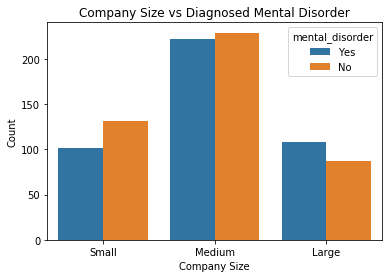

In [13]:
ax = sns.countplot(x = 'comp_sze', hue = 'mental_disorder', data = data, order = ['Small', 'Medium', 'Large'])
plt.title('Company Size vs Diagnosed Mental Disorder')
plt.xlabel('Company Size')
plt.ylabel('Count')

### Company Size vs Age Range
The graph below shows that as that the average age increase as the company size increase.

Text(0,0.5,'Count')

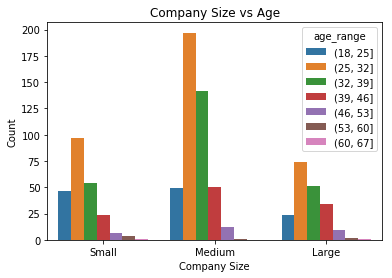

In [14]:
ax = sns.countplot(x = 'comp_sze', hue = 'age_range', data = data, order = ['Small', 'Medium', 'Large'])
plt.title('Company Size vs Age')
plt.xlabel('Company Size')
plt.ylabel('Count')

In [15]:
print('Small company mean age is:', stats.mean(s_data['age']))
print('Medium company mean age is:', stats.mean(m_data['age']))
print('Large company mean age is:', stats.mean(l_data['age']))

Small company mean age is: 31.724137931034484
Medium company mean age is: 32.69179600886918
Large company mean age is: 34.11794871794872


### Age Range vs Mental Disorder (all company sizes)
There is a clear increase in the rate of mental disorder as employees age and a confounding variable may be due purely to people becoming more susceptible to mental illness as they age.

Text(0,0.5,'Count')

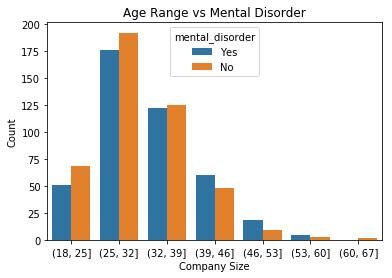

In [16]:
ax = sns.countplot(x = 'age_range', hue = 'mental_disorder', data = data)
plt.title('Age Range vs Mental Disorder')
plt.xlabel('Company Size')
plt.ylabel('Count')

### Age Range vs Mental Disorder (small, medium and large company size)

The trend persist through company size there is a consistent steady increase the older people are.

Text(0,0.5,'Count')

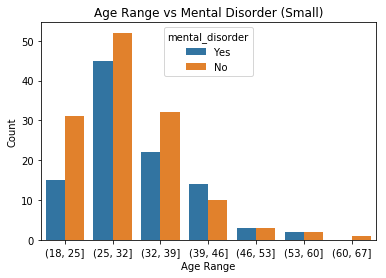

In [17]:
ax = sns.countplot(x = 'age_range', hue = 'mental_disorder', data = s_data)
plt.title('Age Range vs Mental Disorder (Small)')
plt.xlabel('Age Range')
plt.ylabel('Count')

Text(0,0.5,'Count')

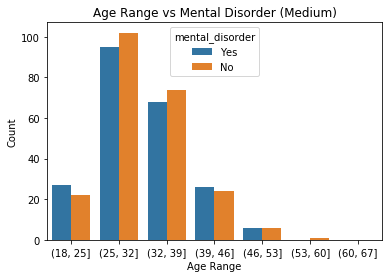

In [18]:
ax = sns.countplot(x = 'age_range', hue = 'mental_disorder', data = m_data)
plt.title('Age Range vs Mental Disorder (Medium)')
plt.xlabel('Age Range')
plt.ylabel('Count')

Text(0,0.5,'Count')

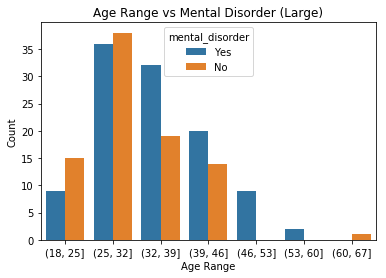

In [19]:
ax = sns.countplot(x = 'age_range', hue = 'mental_disorder', data = l_data, hue_order = ['Yes', 'No'])
plt.title('Age Range vs Mental Disorder (Large)')
plt.xlabel('Age Range')
plt.ylabel('Count')

### Mental Disorder vs Observed Negative Consequences
People believe that their mental health with affect their career more likely if they have a mental illness. This may due to knowing the severity of mental disorders and self bias they have against themselves for being mentally ill.

Text(0,0.5,'Count')

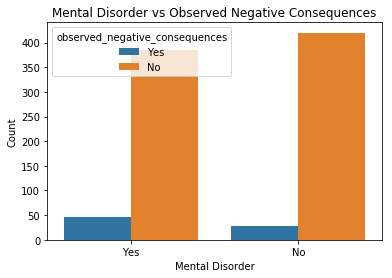

In [20]:
ax = sns.countplot(x = 'mental_disorder', hue = 'observed_negative_consequences',
                   data = data, hue_order = ['Yes', 'No'], order = ['Yes', 'No'])
plt.title('Mental Disorder vs Observed Negative Consequences')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

## Observed Consequences vs Mental Disorder vs Believing Mental Health Will Hurt Career
We will be seeing if observing negative consequences in the workplace effects the chance that the employee will believe their mental health with hurt their career. 
We lined this up with whether they have a diagnosed mental disorder. We saw a large positive correlation with having mental disorder and believing it will hurt their career stated previously. We also compared the company size between each other.

### Observed Negative Consequences At Work
Graphs below will be the Mental Disorder vs Belief Mental Health Hurt Career for the employee that observed negative consequences at work.

Text(0,0.5,'Count')

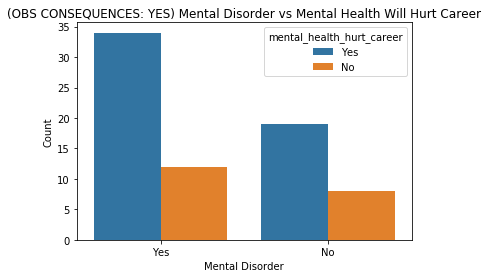

In [21]:
# it is more likely that I think mental health will hurt my career

col = ["Yes" if "Yes" in each else "No" for each in data['mental_health_hurt_career']]
temp = data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "Yes"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, order = ['Yes', 'No']) 
plt.title('(OBS CONSEQUENCES: YES) Mental Disorder vs Mental Health Will Hurt Career')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

For small companies with observed negative consequences, there is not much of a difference between believing that mental health will hurt their career. There is a large majority that mental health issues will hurt their career

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Count')

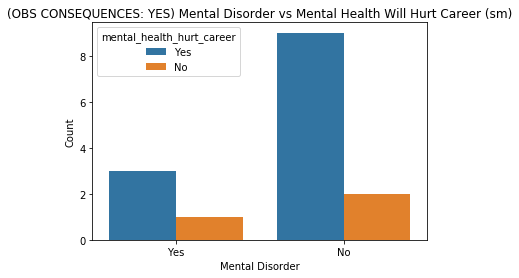

In [22]:
col = ["Yes" if "Yes" in each else "No" for each in s_data['mental_health_hurt_career']]
temp = s_data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "Yes"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, hue_order = ['Yes', 'No'], order = ['Yes', 'No']) 
plt.title('(OBS CONSEQUENCES: YES) Mental Disorder vs Mental Health Will Hurt Career (sm)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

There is a large difference between the believe that mental health will hurt their career between the diagnosed and the mental disorder free. The belief that having mental health issues is extremely high compared for the diagnosed if there are observed negative consequences in the workplace.

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Count')

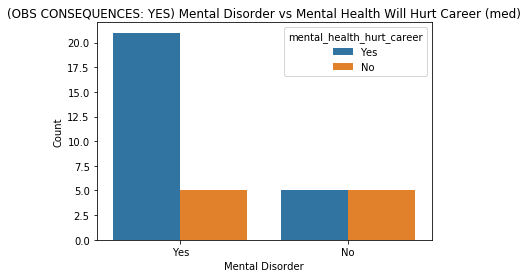

In [23]:
col = ["Yes" if "Yes" in each else "No" for each in m_data['mental_health_hurt_career']]
temp = m_data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "Yes"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, order = ['Yes', 'No'])
plt.title('(OBS CONSEQUENCES: YES) Mental Disorder vs Mental Health Will Hurt Career (med)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

There is interesting change between medium and large companies. Large companies  has a much higher ratios for believieng mental health will hurt their career for those with no mental disorder.

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Count')

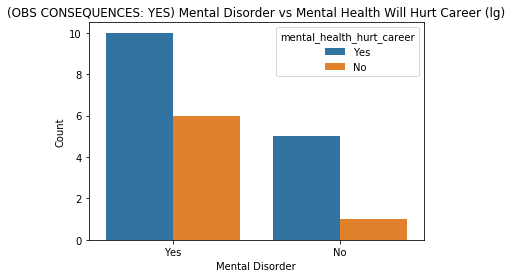

In [24]:
col = ["Yes" if "Yes" in each else "No" for each in l_data['mental_health_hurt_career']]
temp = l_data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "Yes"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, order = ['Yes', 'No'])
plt.title('(OBS CONSEQUENCES: YES) Mental Disorder vs Mental Health Will Hurt Career (lg)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

### No Observed Negative Consequences At Work
Graph below show Mental Disorder vs Belief Mental Health Will Hurt Career for those that did not see observe negative consequences.

For all company sizes, those without mental disorder believe that have one will hurt their career much less likely then those with mental disorders.

Text(0,0.5,'Count')

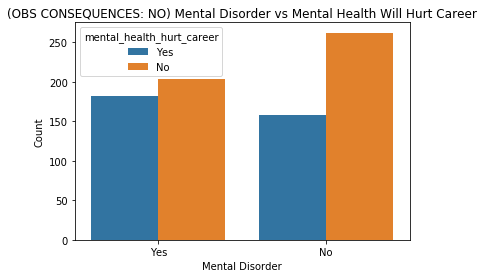

In [25]:
# it is more likely that I think mental health will hurt my career

col = ["Yes" if "Yes" in each else "No" for each in data['mental_health_hurt_career']]
temp = data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "No"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   hue_order = ['Yes', 'No'], data = temp) 
plt.title('(OBS CONSEQUENCES: NO) Mental Disorder vs Mental Health Will Hurt Career')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

For small companies, the belief that mental health will hurt their career is much higher in ratio for those with mental illnesses.

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Count')

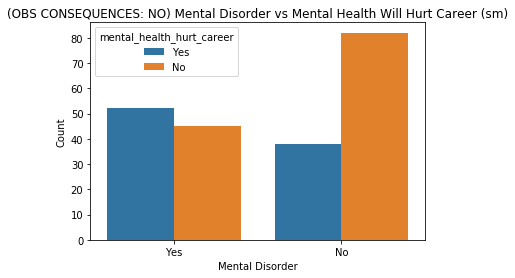

In [26]:
col = ["Yes" if "Yes" in each else "No" for each in s_data['mental_health_hurt_career']]
temp = s_data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "No"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, hue_order = ['Yes', 'No'], order = ['Yes', 'No']) 
plt.title('(OBS CONSEQUENCES: NO) Mental Disorder vs Mental Health Will Hurt Career (sm)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

With or without a mental disorder, it is about even with the belief that mental health will hurt their career.

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Count')

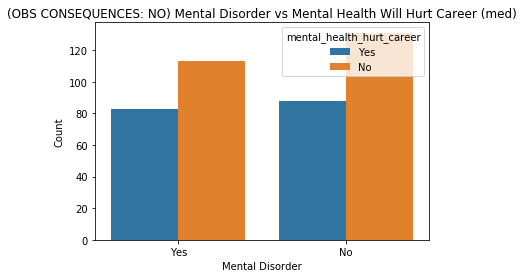

In [27]:
col = ["Yes" if "Yes" in each else "No" for each in m_data['mental_health_hurt_career']]
temp = m_data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "No"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, hue_order = ['Yes', 'No'], order = ['Yes', 'No']) 
plt.title('(OBS CONSEQUENCES: NO) Mental Disorder vs Mental Health Will Hurt Career (med)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

For large companies, having mental disorders will make the employee believe that having a believe if having a mental disorder will hurt your career.

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Count')

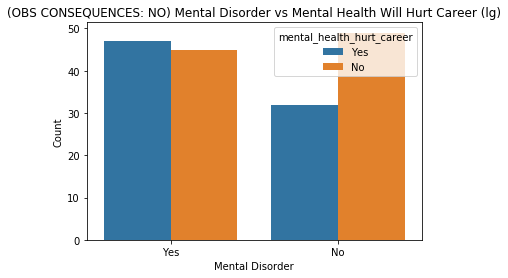

In [28]:
col = ["Yes" if "Yes" in each else "No" for each in l_data['mental_health_hurt_career']]
temp = l_data
temp['mental_health_hurt_career'] = col

temp = temp[temp['observed_negative_consequences'] == "No"]

ax = sns.countplot(x = 'mental_disorder', hue = 'mental_health_hurt_career',
                   data = temp, hue_order = ['Yes', 'No'], order = ['Yes', 'No']) 
plt.title('(OBS CONSEQUENCES: NO) Mental Disorder vs Mental Health Will Hurt Career (lg)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

Overall and throughout company size and seeing negative consequences or not, having a mental disorder will make one believe that it will affect their career more than those without one.

## Mental Discussion Negative vs Mental Disorder
This graph shows if those with and without mental illness and believe that there will be a negative effect speaking to their boss about mental illness. More believe that there won't be a negative effect. Those with mental disorder did believe in the negative effect more often than those without.

Text(0,0.5,'Count')

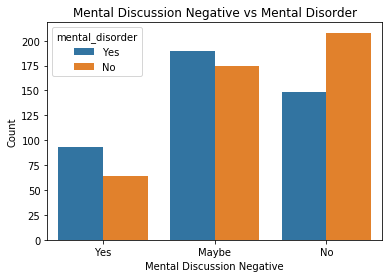

In [29]:
mental_discussion_negative_boss = pd.DataFrame(data['mental_discussion_negative'])
mental_discussion_negative_boss['mental_disorder'] = data['mental_disorder']

ax = sns.countplot(x = 'mental_discussion_negative', hue = 'mental_disorder',
                   data = mental_discussion_negative_boss, order = ['Yes', 'Maybe', 'No']) 
plt.title('Mental Discussion Negative vs Mental Disorder')
plt.xlabel('Mental Discussion Negative')
plt.ylabel('Count')

## Convert the booleans to number.
We turned 'Yes' into 1.0, 'No' to -1.0 and neutral answers like 'I don't know, N/A, Maybe' into 0.0.

In [30]:
data['mental_disorder'] = data['mental_disorder'].apply(convert)
data['mental_health_care'] = data['mental_health_care'].apply(convert)
data['formal_discussion'] = data['formal_discussion'].apply(convert)
data['mental_discussion_negative'] = data['mental_discussion_negative'].apply(convert)
data['mental_disorder_past'] = data['mental_disorder_past'].apply(convert)
data['coworker_safe_space'] = data['coworker_safe_space'].apply(convert)
data['resources_provided'] = data['resources_provided'].apply(convert)
data.describe()

,is_tech,mental_health_care,formal_discussion,resources_provided,mental_discussion_negative,coworker_safe_space,mental_disorder_past,mental_disorder,sought_treatment,age,Small,Medium,Large
count,878.0,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1.0,0.267654,-0.556948,-0.257403,-0.226651,-0.062642,0.185649,-0.018223,0.572893,32.752847,0.264237,0.513667,0.222096
std,0.0,0.762656,0.774930,0.794671,0.730424,0.748663,0.896426,1.000404,0.494940,7.114904,0.441177,0.500098,0.415892
min,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,28.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,32.000000,0.000000,1.000000,0.000000
75%,1.0,1.000000,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000,37.000000,1.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000,1.000000,1.000000,1.000000


In [31]:
s_data['mental_disorder'] = s_data['mental_disorder'].apply(convert)
s_data['mental_health_care'] = s_data['mental_health_care'].apply(convert)
s_data['formal_discussion'] = s_data['formal_discussion'].apply(convert)
s_data['mental_discussion_negative'] = s_data['mental_discussion_negative'].apply(convert)
s_data['mental_disorder_past'] = s_data['mental_disorder_past'].apply(convert)
s_data['coworker_safe_space'] = s_data['coworker_safe_space'].apply(convert)
s_data['resources_provided'] = s_data['resources_provided'].apply(convert)
s_data.describe()

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,is_tech,mental_health_care,formal_discussion,resources_provided,mental_discussion_negative,coworker_safe_space,mental_disorder_past,mental_disorder,sought_treatment,age,Small,Medium,Large
count,232.0,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0,232.0,232.0
mean,1.0,-0.103448,-0.672414,-0.564655,-0.271552,-0.043103,0.129310,-0.129310,0.530172,31.724138,1.0,0.0,0.0
std,0.0,0.771565,0.705892,0.687017,0.766993,0.782849,0.907212,0.993748,0.500168,7.917963,0.0,0.0,0.0
min,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,19.000000,1.0,0.0,0.0
25%,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,26.000000,1.0,0.0,0.0
50%,1.0,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,30.000000,1.0,0.0,0.0
75%,1.0,0.250000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.0,0.0,0.0
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.000000,1.0,0.0,0.0


In [32]:
m_data['mental_disorder'] = m_data['mental_disorder'].apply(convert)
m_data['mental_health_care'] = m_data['mental_health_care'].apply(convert)
m_data['formal_discussion'] = m_data['formal_discussion'].apply(convert)
m_data['mental_discussion_negative'] = m_data['mental_discussion_negative'].apply(convert)
m_data['mental_disorder_past'] = m_data['mental_disorder_past'].apply(convert)
m_data['coworker_safe_space'] = m_data['coworker_safe_space'].apply(convert)
m_data['resources_provided'] = m_data['resources_provided'].apply(convert)
m_data.describe()

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,is_tech,mental_health_care,formal_discussion,resources_provided,mental_discussion_negative,coworker_safe_space,mental_disorder_past,mental_disorder,sought_treatment,age,Small,Medium,Large
count,451.0,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.0,451.0,451.0
mean,1.0,0.356984,-0.589800,-0.266075,-0.248337,-0.055432,0.190687,-0.015521,0.569845,32.691796,0.0,1.0,0.0
std,0.0,0.720379,0.755885,0.780414,0.718310,0.720516,0.893931,1.000990,0.495647,6.305934,0.0,0.0,0.0
min,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,21.000000,0.0,1.0,0.0
25%,1.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,28.000000,0.0,1.0,0.0
50%,1.0,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,32.000000,0.0,1.0,0.0
75%,1.0,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,36.000000,0.0,1.0,0.0
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.000000,0.0,1.0,0.0


In [33]:
l_data['mental_disorder'] = l_data['mental_disorder'].apply(convert)
l_data['mental_health_care'] = l_data['mental_health_care'].apply(convert)
l_data['formal_discussion'] = l_data['formal_discussion'].apply(convert)
l_data['mental_discussion_negative'] = l_data['mental_discussion_negative'].apply(convert)
l_data['mental_disorder_past'] = l_data['mental_disorder_past'].apply(convert)
l_data['coworker_safe_space'] = l_data['coworker_safe_space'].apply(convert)
l_data['resources_provided'] = l_data['resources_provided'].apply(convert)
l_data.describe()

C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,is_tech,mental_health_care,formal_discussion,resources_provided,mental_discussion_negative,coworker_safe_space,mental_disorder_past,mental_disorder,sought_treatment,age,Small,Medium,Large
count,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.0,195.0
mean,1.0,0.502564,-0.343590,0.128205,-0.123077,-0.102564,0.241026,0.107692,0.630769,34.117949,0.0,0.0,1.0
std,0.0,0.691438,0.855484,0.785811,0.707275,0.773094,0.890013,0.996743,0.483839,7.668481,0.0,0.0,0.0
min,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,20.000000,0.0,0.0,1.0
25%,1.0,0.000000,-1.000000,-0.500000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,29.000000,0.0,0.0,1.0
50%,1.0,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,32.000000,0.0,0.0,1.0
75%,1.0,1.000000,0.500000,1.000000,0.000000,0.500000,1.000000,1.000000,1.000000,39.000000,0.0,0.0,1.0
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000,0.0,0.0,1.0


### Company Size vs Believing Mental Health Issues Will Hurt Career

The trend is not extremely clear but the large company size has the highest ratios of Yes. We hypothesize that because the company is large, people in the company believe for themselves to be easily replacable and not important that is also the reason that causes higher mental disorder rates in large companies.

Text(0,0.5,'Count')

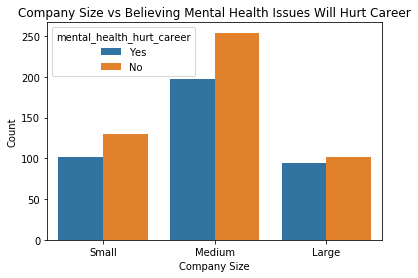

In [34]:
ax = sns.countplot(x = 'comp_sze', hue = 'mental_health_hurt_career', data = data,
                order = ['Small', 'Medium', 'Large'], hue_order = ['Yes', 'No'])
plt.title('Company Size vs Believing Mental Health Issues Will Hurt Career')
plt.xlabel('Company Size')
plt.ylabel('Count')

## Mental diagnoses
Since the mental diagnosis was the multiple choice and surveytakers were allowed to choose multiple answers, we recorded each instance of each mental illness. Mood disorders, such as depression, and anxiety disorder for all company sizes which made sense from the fact the the two previously mentioned are the most prevalent illnesses.

In [35]:
mood = 0
anx = 0
att = 0
stress = 0
ptsd = 0
psych = 0
ocd = 0
pers = 0
eat = 0
sub = 0
addict = 0
seas = 0
for cond in data['condition']:
    if type(cond) is str:
        if 'Mood' in cond:
            mood = mood + 1
        if 'Anxiety' in cond:
                anx = anx + 1
        if 'Attention' in cond:
            att = att + 1
        if 'Stress Response' in cond:
            stress = stress + 1
        if 'Post-traumatic' in cond:
            ptsd = ptsd + 1
        if 'Psychotic' in cond:
            psych = psych + 1
        if 'Obsessive' in cond:
            ocd = ocd + 1
        if 'Personality' in cond:
            pers = pers + 1
        if 'Eating' in cond:
            eat = eat + 1
        if 'Substance Use' in cond:
            sub = sub + 1
        if 'Addictive' in cond:
            addict = addict + 1
        if 'Seasonal' in cond:
            seas = seas + 1
            
condition = pd.DataFrame([mood,anx,att,ptsd,ocd,stress,pers,sub,eat,addict,psych,seas], 
['Mood', 'Anxiety', 'ADD', 'PTSD', 'OCD', 'Stress Response', 'Personality', 'Substance Abuse', 'Eating', 'Addiction', 'Psychotic', 'Seasonal Affective'], columns = ['Count'])
condition

,Count
Mood,322
Anxiety,225
ADD,80
PTSD,39
OCD,28
Stress Response,19
Personality,19
Substance Abuse,13
Eating,12
Addiction,9


Text(0,0.5,'Count')

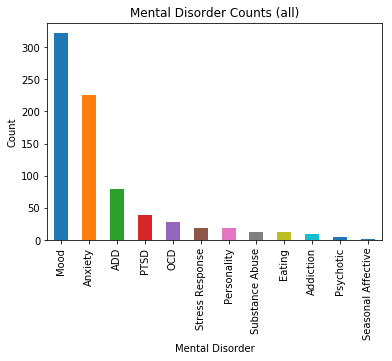

In [36]:
condition['Count'].plot(kind='bar');
plt.title('Mental Disorder Counts (all)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

In [37]:
mood = 0
anx = 0
att = 0
stress = 0
ptsd = 0
psych = 0
ocd = 0
pers = 0
eat = 0
sub = 0
addict = 0
seas = 0
for cond in s_data['condition']:
    if type(cond) is str:
        if 'Mood' in cond:
            mood = mood + 1
        if 'Anxiety' in cond:
                anx = anx + 1
        if 'Attention' in cond:
            att = att + 1
        if 'Stress Response' in cond:
            stress = stress + 1
        if 'Post-traumatic' in cond:
            ptsd = ptsd + 1
        if 'Psychotic' in cond:
            psych = psych + 1
        if 'Obsessive' in cond:
            ocd = ocd + 1
        if 'Personality' in cond:
            pers = pers + 1
        if 'Eating' in cond:
            eat = eat + 1
        if 'Substance Use' in cond:
            sub = sub + 1
        if 'Addictive' in cond:
            addict = addict + 1
        if 'Seasonal' in cond:
            seas = seas + 1
            
condition = pd.DataFrame([mood,anx,att,ptsd,ocd,stress,pers,sub,eat,addict,psych,seas], 
['Mood', 'Anxiety', 'ADD', 'PTSD', 'OCD', 'Stress Response', 'Personality', 'Substance Abuse', 'Eating', 'Addiction', 'Psychotic', 'Seasonal Affective'], columns = ['Count'])
condition

,Count
Mood,74
Anxiety,50
ADD,11
PTSD,7
OCD,7
Stress Response,7
Personality,10
Substance Abuse,2
Eating,3
Addiction,4


Text(0,0.5,'Count')

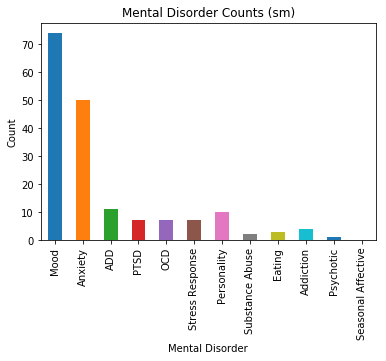

In [38]:
condition['Count'].plot(kind='bar');
plt.title('Mental Disorder Counts (sm)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

In [39]:
mood = 0
anx = 0
att = 0
stress = 0
ptsd = 0
psych = 0
ocd = 0
pers = 0
eat = 0
sub = 0
addict = 0
seas = 0
for cond in m_data['condition']:
    if type(cond) is str:
        if 'Mood' in cond:
            mood = mood + 1
        if 'Anxiety' in cond:
                anx = anx + 1
        if 'Attention' in cond:
            att = att + 1
        if 'Stress Response' in cond:
            stress = stress + 1
        if 'Post-traumatic' in cond:
            ptsd = ptsd + 1
        if 'Psychotic' in cond:
            psych = psych + 1
        if 'Obsessive' in cond:
            ocd = ocd + 1
        if 'Personality' in cond:
            pers = pers + 1
        if 'Eating' in cond:
            eat = eat + 1
        if 'Substance Use' in cond:
            sub = sub + 1
        if 'Addictive' in cond:
            addict = addict + 1
        if 'Seasonal' in cond:
            seas = seas + 1
            
condition = pd.DataFrame([mood,anx,att,ptsd,ocd,stress,pers,sub,eat,addict,psych,seas], 
['Mood', 'Anxiety', 'ADD', 'PTSD', 'OCD', 'Stress Response', 'Personality', 'Substance Abuse', 'Eating', 'Addiction', 'Psychotic', 'Seasonal Affective'], columns = ['Count'])
condition

,Count
Mood,163
Anxiety,121
ADD,46
PTSD,20
OCD,16
Stress Response,9
Personality,6
Substance Abuse,7
Eating,4
Addiction,3


Text(0,0.5,'Count')

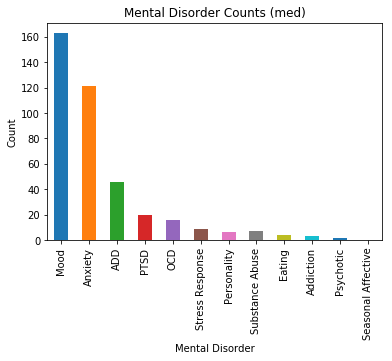

In [40]:
condition['Count'].plot(kind='bar');
plt.title('Mental Disorder Counts (med)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

In [41]:
mood = 0
anx = 0
att = 0
stress = 0
ptsd = 0
psych = 0
ocd = 0
pers = 0
eat = 0
sub = 0
addict = 0
seas = 0
for cond in l_data['condition']:
    if type(cond) is str:
        if 'Mood' in cond:
            mood = mood + 1
        if 'Anxiety' in cond:
                anx = anx + 1
        if 'Attention' in cond:
            att = att + 1
        if 'Stress Response' in cond:
            stress = stress + 1
        if 'Post-traumatic' in cond:
            ptsd = ptsd + 1
        if 'Psychotic' in cond:
            psych = psych + 1
        if 'Obsessive' in cond:
            ocd = ocd + 1
        if 'Personality' in cond:
            pers = pers + 1
        if 'Eating' in cond:
            eat = eat + 1
        if 'Substance Use' in cond:
            sub = sub + 1
        if 'Addictive' in cond:
            addict = addict + 1
        if 'Seasonal' in cond:
            seas = seas + 1
            
condition = pd.DataFrame([mood,anx,att,ptsd,ocd,stress,pers,sub,eat,addict,psych,seas], 
['Mood', 'Anxiety', 'ADD', 'PTSD', 'OCD', 'Stress Response', 'Personality', 'Substance Abuse', 'Eating', 'Addiction', 'Psychotic', 'Seasonal Affective'], columns = ['Count'])
condition

,Count
Mood,85
Anxiety,54
ADD,23
PTSD,12
OCD,5
Stress Response,3
Personality,3
Substance Abuse,4
Eating,5
Addiction,2


Text(0,0.5,'Count')

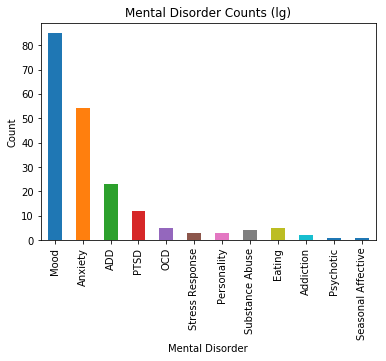

In [42]:
condition['Count'].plot(kind='bar');
plt.title('Mental Disorder Counts (lg)')
plt.xlabel('Mental Disorder')
plt.ylabel('Count')

## Linear Regression: Age Vs Mental Healthcare
There is a clear and strong postive correlation from the graphs below. The most outstanding graph was the graph of the large company size data with strongest and clearest trend of the three company sizes.

Text(0,0.5,'Mental Healthcare')

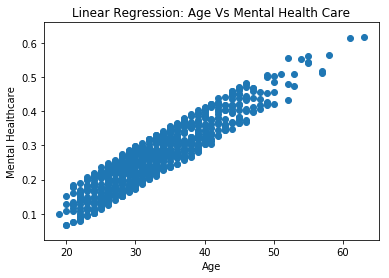

In [43]:
from sklearn.linear_model import LinearRegression

x = np.array(data['age'])
X = []
for i, each in enumerate(x):
    X.append([i, each])
X = np.array(X)

y = np.array(data['mental_health_care'])
Y = []
for i, each in enumerate(y):
    Y.append([i, each])
Y = np.array(Y)

reg = LinearRegression().fit(X, Y)
plt.scatter(x, reg.predict(X)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Care')
plt.xlabel('Age')
plt.ylabel('Mental Healthcare')

Text(0,0.5,'Mental Healthcare')

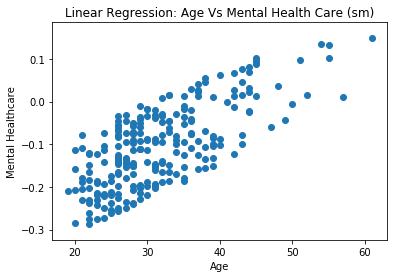

In [44]:
from sklearn.linear_model import LinearRegression

xs = np.array(s_data['age'])
Xs = []
for i, each in enumerate(xs):
    Xs.append([i, each])
Xs = np.array(Xs)

ys = np.array(s_data['mental_health_care'])
Ys = []
for i, each in enumerate(ys):
    Ys.append([i, each])
Ys = np.array(Ys)

regs = LinearRegression().fit(Xs, Ys)
plt.scatter(xs, regs.predict(Xs)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Care (sm)')
plt.xlabel('Age')
plt.ylabel('Mental Healthcare')

Text(0,0.5,'Mental Healthcare')

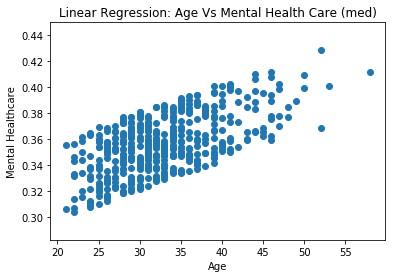

In [45]:
from sklearn.linear_model import LinearRegression

xm = np.array(m_data['age'])
Xm = []
for i, each in enumerate(xm):
    Xm.append([i, each])
Xm = np.array(Xm)

ym = np.array(m_data['mental_health_care'])
Ym = []
for i, each in enumerate(ym):
    Ym.append([i, each])
Ym = np.array(Ym)

regm = LinearRegression().fit(Xm, Ym)
plt.scatter(xm, regm.predict(Xm)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Care (med)')
plt.xlabel('Age')
plt.ylabel('Mental Healthcare')

Text(0,0.5,'Mental Healthcare')

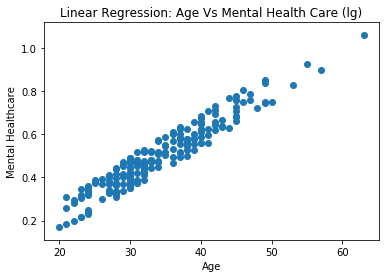

In [46]:
from sklearn.linear_model import LinearRegression

xl = np.array(l_data['age'])
Xl = []
for i, each in enumerate(xl):
    Xl.append([i, each])
Xl = np.array(Xl)

yl = np.array(l_data['mental_health_care'])
Yl = []
for i, each in enumerate(yl):
    Yl.append([i, each])
Yl = np.array(Yl)

regl = LinearRegression().fit(Xl, Yl)
plt.scatter(xl, regl.predict(Xl)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Care (lg)')
plt.xlabel('Age')
plt.ylabel('Mental Healthcare')

## Linear Regression: Age Vs Mental Discussion Negative
There is a unclear and week postive correlation from the graphs below. The most outstanding graph was the graph of the large company size data with strongest and clearest trend of the three company sizes. The belief that self mental disorder discussion with the boss does not increase much with age.

Text(0,0.5,'Mental Health Discussion Negative Effect')

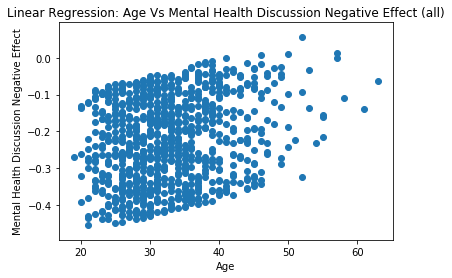

In [47]:
y2 = np.array(data['mental_discussion_negative'])
Y2 = []
for i, each in enumerate(y2):
    Y2.append([i, each])
Y2 = np.array(Y2)

reg2 = LinearRegression().fit(X, Y2)

plt.scatter(x, reg2.predict(X)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Discussion Negative Effect (all)')
plt.xlabel('Age')
plt.ylabel('Mental Health Discussion Negative Effect')
# the younger you are, the MORE likely you are to say that having a discussion with your boss about
# mental health issues will NOT have negative consequences
# if you are older, you are MORE likely to say that having such a discussion with your boss 
# will result in negative consequences

Text(0,0.5,'Mental Health Discussion Negative Effect')

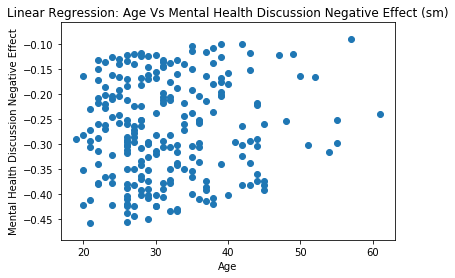

In [48]:
ys2 = np.array(s_data['mental_discussion_negative'])
Ys2 = []
for i, each in enumerate(ys2):
    Ys2.append([i, each])
Ys2 = np.array(Ys2)

regs2 = LinearRegression().fit(Xs, Ys2)

plt.scatter(xs, regs2.predict(Xs)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Discussion Negative Effect (sm)')
plt.xlabel('Age')
plt.ylabel('Mental Health Discussion Negative Effect')

Text(0,0.5,'Mental Health Discussion Negative Effect')

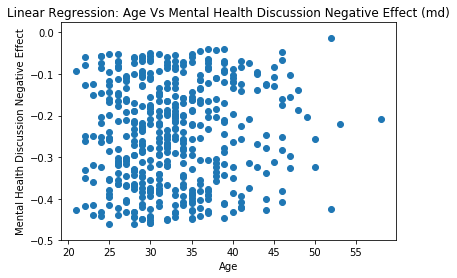

In [49]:
ym2 = np.array(m_data['mental_discussion_negative'])
Ym2 = []
for i, each in enumerate(ym2):
    Ym2.append([i, each])
Ym2 = np.array(Ym2)

regm2 = LinearRegression().fit(Xm, Ym2)

plt.scatter(xm, regm2.predict(Xm)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Discussion Negative Effect (md)')
plt.xlabel('Age')
plt.ylabel('Mental Health Discussion Negative Effect')

Text(0,0.5,'Mental Health Discussion Negative Effect')

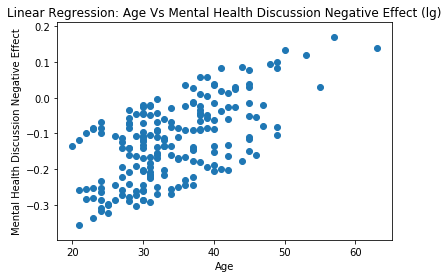

In [50]:
yl2 = np.array(l_data['mental_discussion_negative'])
Yl2 = []
for i, each in enumerate(yl2):
    Yl2.append([i, each])
Yl2 = np.array(Yl2)

regl2 = LinearRegression().fit(Xl, Yl2)

plt.scatter(xl, regl2.predict(Xl)[:, 1])
plt.title('Linear Regression: Age Vs Mental Health Discussion Negative Effect (lg)')
plt.xlabel('Age')
plt.ylabel('Mental Health Discussion Negative Effect')

## Linear Regression: Age Vs Mental Disorder
There is a clear and moderate postive correlation from the graphs below. The most outstanding graph was the graph of the large company size data with strongest and clearest trend of the three company sizes. This follows our theory that people are more susceptible to metal illness with age.

Text(0,0.5,'Mental Disorder')

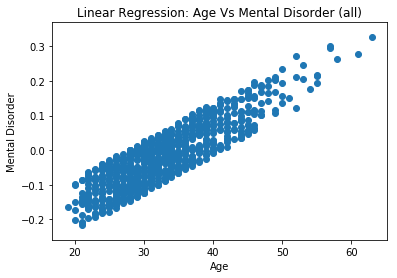

In [51]:
y3 = np.array(data['mental_disorder'])
Y3 = []
for i, each in enumerate(y3):
    Y3.append([i, each])
Y3 = np.array(Y3)

reg3 = LinearRegression().fit(X, Y3)

plt.scatter(x, reg3.predict(X)[:, 1])
plt.title('Linear Regression: Age Vs Mental Disorder (all)')
plt.xlabel('Age')
plt.ylabel('Mental Disorder')

Text(0,0.5,'Mental Disorder')

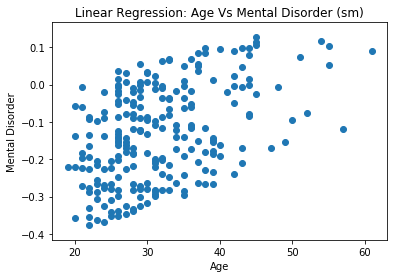

In [52]:
ys3 = np.array(s_data['mental_disorder'])
Ys3 = []
for i, each in enumerate(ys3):
    Ys3.append([i, each])
Ys3 = np.array(Ys3)

regs3 = LinearRegression().fit(Xs, Ys3)

plt.scatter(xs, regs3.predict(Xs)[:, 1])
plt.title('Linear Regression: Age Vs Mental Disorder (sm)')
plt.xlabel('Age')
plt.ylabel('Mental Disorder')

Text(0,0.5,'Mental Disorder')

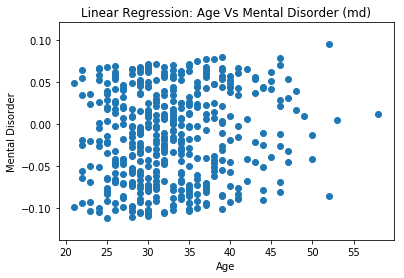

In [53]:
ym3 = np.array(m_data['mental_disorder'])
Ym3 = []
for i, each in enumerate(ym3):
    Ym3.append([i, each])
Ym3 = np.array(Ym3)

regm3 = LinearRegression().fit(Xm, Ym3)

plt.scatter(xm, regm3.predict(Xm)[:, 1])
plt.title('Linear Regression: Age Vs Mental Disorder (md)')
plt.xlabel('Age')
plt.ylabel('Mental Disorder')

Text(0,0.5,'Mental Disorder')

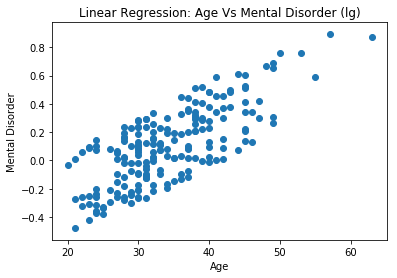

In [54]:
yl3 = np.array(l_data['mental_disorder'])
Yl3 = []
for i, each in enumerate(yl3):
    Yl3.append([i, each])
Yl3 = np.array(Yl3)

regl3 = LinearRegression().fit(Xl, Yl3)

plt.scatter(xl, regl3.predict(Xl)[:, 1])
plt.title('Linear Regression: Age Vs Mental Disorder (lg)')
plt.xlabel('Age')
plt.ylabel('Mental Disorder')

## Ethics & Privacy

While we attempt to draw conclusions, we will be working with personal information of various employees’ age, gender, family mental health, ect. taken from the 2016 Open Sourcing Mental Illness (OSMI) Mental Health Tech Survey. It is important to note that the data we are using has been released to the public under a Creative Commons Attribution - ShareAlike 4.0 International License. This license allows anyone to redistribute, “transform, and build upon the material for any purpose, even commercially” (as described on the [Creative Commons website](https://creativecommons.org/licenses/by-sa/4.0/)). This license gives us permission to use the data for this project. 

Prior to completing the survey, OSMI informed the participants that “all responses are anonymous, and (that) no identifying information will be collected or stored.” This is true, by the definition of identifiers provided by the Safe Harbour Method, since none of those variables are present within the dataset to start with. The only possible variable that would violate this method would be age, since some participants reported to be over 90 years old. To fully protect the anonymity of the participants in our analysis, any response whose age was outside the range of (18,65) was removed during the data-cleaning process.Also, as mentioned before, the Creative Commons License allows us to modify the dataset in such a way that is needed to reach a conclusion. 

All the data was ethically procured, since participants elected to take the survey knowing that it was anonymous and with the knowledge that the information collected could be distributed publicly. While the sample size of those who did complete the survey is sufficient to analyze, it cannot necessarily be extrapolated as a reliable sample of the tech industry as a whole due to the fact that there might be some bias. Because the survey was voluntary, there was no means of randomization or random sampling that would reduce the responses at any extreme. For example, someone with the mental illness may be more prone to find the OSMI survey or more inclined to take it, as they would be more affected in raising awareness for mental illness in their industry. This may lead to bias in the data.


## Conclusion & Discussion
Based on our analysis, we’ve concluded that company size has a strong correlation with both frequency of mental disorder diagnosis in employees as well as negative beliefs about how mental health is addressed in their workplace. There is a clear correlation between company size and the ratio with and without mental disorders. As the size of the company grows, the employees were more likely to have a mental disorder. In our regression of mental disorder and age, the large size companies had the strongest positive correlation along with all the linear regression graphs. From our bar plot with age range and mental disorder, we say that age may be a confounding variable to the correlation we found. Mental disorder increased through age, regardless of company size. Peaking in growth around the 32-39 age group which is said to be around the middle aged crisis. Another reason for this increase in mental disorder as people age may be due to the fact that there is a strong positive linear relationship between age and having mental health care. It could be that the reason rates in get higher as people age is due to having better coverage and the ability to be diagnosed. The larger amount of mental disorders in larger company may also be due to the fact that the average age of an employee in a company increase with size. Small, medium and large company average ages are 31.7, 32.7 and 34.1 respectively. There is a clear indication that the average age may take partial effect for the negative effect on mental health and increase in mental disorders as company sizes increase. Age has a clear cut effect on mental illness and that has a confounding effect on our claim though there is a seen effect of company size on the mental health of employees.

Our other hypothesis effect that larger companies have a more negative environment of mental health due to the fact that purely by size, a single individual does not feel important and replaceable in the system. Their sense of purpose and self worth would be diminished by the stark environment without much meaningful connection to those they spend most of their day with. This was not as clear so we chose not to reject the null hypothesis that larger companies have a more negative environment. The clearer trend we saw from the analysis of negative environment had to do with the perceived effect of having a mental disorder in the workplace would cause. In large companies, those who do not have mental illness will determine their believe of whether mental health issue can hurt their career based on the observed negative consequences. While those with a diagnosed mental disorder will have less of a change in their belief that mental health issues will hurt their career with observing negative consequences at work or not. If there are observed negative consequences at work, those with mental disorders or not have about the same rate with those affected by mental disorder being a little higher of believing that mental health issues will hurt their career at around 65-75% believing yes. On the other hand, in the circumstance of no observed negative consequences, those with mental disorder believed that having mental health issues will negatively affect their career is around 45% while those without mental disorders were 35%. Those with mental disorders still feel the stigma around having one and seem more reluctant to share which can be more detrimental to their mental health in the long run.
